# Data Generation

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# 검증용은 valid_split 비율을 정했다면 요번에는 별도로 뽑아볼 것이다.학습용에서 검증용을 뽑을 것.

### mnist dataset 다운로드

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 생성된 데이터 확인
print(f'학습용 X 데이터의 자료형 : \n{type(X_train)}')

print(f'학습용 Y 데이터의 모양 : \n{type(y_train)}')

print('*'*80)

print(f'학습용 X 데이터의 모양 : \n{X_train.shape}')

print('*'*80)

print(f'학습용 Y 데이터의 모양 : \n{y_train.shape}')

print(f'평가용 X 데이터의 모양 : \n{X_test.shape}')

학습용 X 데이터의 자료형 : 
<class 'numpy.ndarray'>
학습용 Y 데이터의 모양 : 
<class 'numpy.ndarray'>
********************************************************************************
학습용 X 데이터의 모양 : 
(60000, 28, 28)
********************************************************************************
학습용 Y 데이터의 모양 : 
(60000,)
평가용 X 데이터의 모양 : 
(10000, 28, 28)


## Data Pre-Processing

In [3]:
## 2차원 배열 --> 3차운 배열

'''
1. reshape((60000, 28, 28, 1)) 함수를 사용
2. 손글씨 이미지의 모양 변경 : 2차원(28, 28) --> 3차원(28, 28, 1)

'''

# 자연어할 때 LSTM(RNN)의 입력을 보면 데이터수는 batch_size를 줘야 결정이 되는데

# 32가 되던 64가 되던 채워지는거고 이제 나머지가 2차원으로 ...

# ( N, 476, 16 ) 이거에 비해서 4차원으로 들어간다...COnv2D의 형식자체가 공식문서 참조했을 때 4차원이다.

X_train = X_train.reshape((60000,28,28,1)) # 전체데이터의 수, 이미지 하나당 28,28 --> 28,28,1로 바꾼다

X_test = X_test.reshape((10000, 28, 28, 1)) # 차원 하나를 늘린다고 변하지 않는다, 일종의 트릭

# 결과 확인
print(f'차원 변환 후 학습용 데이터의 모양 : \n{X_train.shape}')

print('*'*80)

print(f'차원 변환 후 평가용 데이터의 모양 : \n{X_test.shape}')

차원 변환 후 학습용 데이터의 모양 : 
(60000, 28, 28, 1)
********************************************************************************
차원 변환 후 평가용 데이터의 모양 : 
(10000, 28, 28, 1)


In [4]:
### Scaling(normalizing) : 픽셀의 범위를 0과 1사이로 변환

# 넘파이 배열이어서 255로 나눠서 reshape.

X_train = X_train / 255
X_test = X_test / 255

# 결과 확인
print(f'학습용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : {np.max(X_train[0, :, :, :])}, 최솟값 : {np.min(X_train[0, :, :, :])}')

print('*'*80)

print(f'평가용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : {np.max(X_test[0,:,:,:])}, 최솟값 : {np.min(X_test[0, :, :, :])}')

# 검증용을 반드시 만들 필요는 없다.

# 전처리 끝.


학습용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : 1.0, 최솟값 : 0.0
********************************************************************************
평가용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : 1.0, 최솟값 : 0.0


## 학습용 / 검증용 데이터 생성

In [5]:
'''
1. train_test_split() 함수를 사용
2. 학습용 데이터의 일부를 검증용 데이터로 분할
'''

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, #validation_split=0.2 쓰면되는데.. 이렇게 쓰는 사람도 있다.
                 random_state=0)

# 결과 확인

print(f'학습용 X 데이터의 모양 : {X_train.shape}')

print('*'*80)

print(f'검증용 X 데이터의 모양 : {X_val.shape}')

학습용 X 데이터의 모양 : (48000, 28, 28, 1)
********************************************************************************
검증용 X 데이터의 모양 : (12000, 28, 28, 1)


## CNN Model Generation

In [6]:
### 모델 생성도 2가지 방법이 있음.
# 1. 사용자 정의 함수
    ### 모델 생성함수 정의

def create_model():
    # 모델 구조 정의하기
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
    # 첫번째 입력받는 Conv2D는 지정해서 오류를 내지않게 막아준다.
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    return model
    
    
# 1 모델 구조 정의
# 2 컴파일(compile) 어떤 손실함수로 최적화할거며.. 정해져야 한다

# 책에서는 Dense Layer를 두번 사용함. Dense Layer와 Dense Layer사이에 dropout을 넣는다. Dense layer를 여러번 쓸 경우..

In [7]:
### 모델의 구조 확인

# 모델 생성 함수 호출, 모델 생성

cnn = create_model()

# model.summary() 함수 사용

cnn.summary()

# 18496은 어떻게 나오느냐..

# 32*9+1*64=18496

# +1은 y절편. 289필터가 64개가 있다.. 가중치의 숫자가 18496.

# flatten -> Dense도 3136+1(절편)*10행 = 31370

# 시드 설정을 안해서 값은 개개인마다 다 다를 것이다.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)               

In [8]:
### 학습이 되지 않은 모델의 가중치 확인 --> 0에 가까운 실수
print(cnn.weights) #학습에 의해서 가중치가 변해간다..는걸 알면 된다.

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.11260578, -0.04342863,  0.06048968, -0.08023157,
           0.05573319, -0.0419383 , -0.07560243, -0.00272986,
          -0.01465008, -0.00695013,  0.10854517,  0.0877268 ,
          -0.02940717, -0.06140627, -0.0927071 , -0.06710476,
           0.09425162, -0.09680038, -0.06264424, -0.09057833,
          -0.10460521, -0.04713024,  0.04660384, -0.02962252,
           0.0153674 ,  0.01790302, -0.12711892, -0.11004233,
           0.09131941, -0.03114128, -0.0890002 , -0.06161647]],

        [[ 0.1403913 , -0.13683458,  0.06945312, -0.06470659,
           0.10781993,  0.03650513, -0.13418049, -0.05483297,
           0.08053541, -0.06004925, -0.02854141, -0.07790422,
           0.03896973,  0.08552663,  0.05045059, -0.10120746,
           0.05116935,  0.09445591, -0.04538339,  0.02985051,
           0.02934739,  0.10848708, -0.04143338,  0.1231889 ,
          -0.11603731,  0.09363832, -0.02374578,  0.010

# Model Learning

In [9]:
## model 컴파일(compile)
#- 개념 : 손실 함수 정의 + 최적화 함수 --> 모델 완성
#- 손실 함수 : 모델이 계산한 예측과 정답(label)을 비교하여 손실(loss)을 계산
#- 학습 : 경사하강법 --> 손실을 최소화하는 가중치 획득

#**손실 함수 외우자! ** 
#이진 분류(binary classification)
#tf.keras.losses.BinaryCrossentrypo
#model.compile(loss='binary_crossentropy')
#
#- 0일 확률이 30이고 1일 확률이 70이야
#
#다중분류(multi classification)
#1. tf.keras.losses.CategoricalCrossentropy() : 
#label --> One-Hot Encoding 
#model.compile(loss='categorical_crossentropy')
#
#2. tf.keras.losses.SparseCategoricalCrossentropy() :
#label --> 정수 인코딩
#model.compile(loss='sparse_categorical_crossentropy')

#최적화
#-최적화 함수
#1 tf.keras.optimizers.Adam(learning_rate)
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc]'))
#2 pdf참조


In [10]:
### 모델 컴파일 --> 손실 함수 정의 + 가중치 최적화 방식 + 검증용 데이터 평가 방식 --> 모델 완성
cnn.compile(loss='sparse_categorical_crossentropy', 
            optimizer='adam',
            metrics=['accuracy'])

In [11]:
### 모델 학습 --> LSTM과는 달리 학습의 결과물을 저장할 수 있음
history = cnn.fit(x=X_train,
                  y=y_train,
                  batch_size=64,
                  epochs=10, #학습횟수
                  validation_data=(X_val, y_val))#데이터를 직접 넣어줄 것이다.

# 과적합일어날 때 멈추고 싶을 때 callback을 하면됨. tf.keras.callbacks.EarlyStopping, patience 몇번까지 참아줄것인가, 이후 학습중지

# tf.keras.callback.modelCheckpoint 저장의 조건을 설정

Epoch 1/10


750/750 [==============================] - 16s 18ms/step - loss: 0.2209 - accuracy: 0.9337 - val_loss: 0.0911 - val_accuracy: 0.9715
Epoch 2/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.0650 - val_accuracy: 0.9795
Epoch 3/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0494 - accuracy: 0.9849 - val_loss: 0.0471 - val_accuracy: 0.9845
Epoch 4/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0480 - val_accuracy: 0.9845
Epoch 5/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0417 - val_accuracy: 0.9867
Epoch 6/10
750/750 [==============================] - 13s 18ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0384 - val_accuracy: 0.9872
Epoch 7/10
750/750 [==============================] - 14s 18ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0478 - val_accurac

## 학습 결과 시각화(Visualization)

In [12]:
### 학습의 결과물 저장 변수 history 확인
print(history)
print('*'*80)
print(type(history.history))
print('*'*80)
print(history.history)
print('*'*80)


********************************************************************************
<class 'dict'>
********************************************************************************
{'loss': [0.22085817158222198, 0.06498435139656067, 0.04936377331614494, 0.03819374740123749, 0.03146269544959068, 0.025217704474925995, 0.021774256601929665, 0.017588146030902863, 0.01439313031733036, 0.012558265589177608], 'accuracy': [0.9337499737739563, 0.9804375171661377, 0.9848750233650208, 0.9878749847412109, 0.9904583096504211, 0.992104172706604, 0.9930833578109741, 0.9946041703224182, 0.995520830154419, 0.9961666464805603], 'val_loss': [0.09107349812984467, 0.06496025621891022, 0.0470648817718029, 0.04804885759949684, 0.041661586612463, 0.038420312106609344, 0.047829244285821915, 0.045342009514570236, 0.047255776822566986, 0.04899926111102104], 'val_accuracy': [0.9714999794960022, 0.9794999957084656, 0.984499990940094, 0.984499990940094, 0.9866666793823242, 0.9872499704360962, 0.9849166870117188, 0.9856

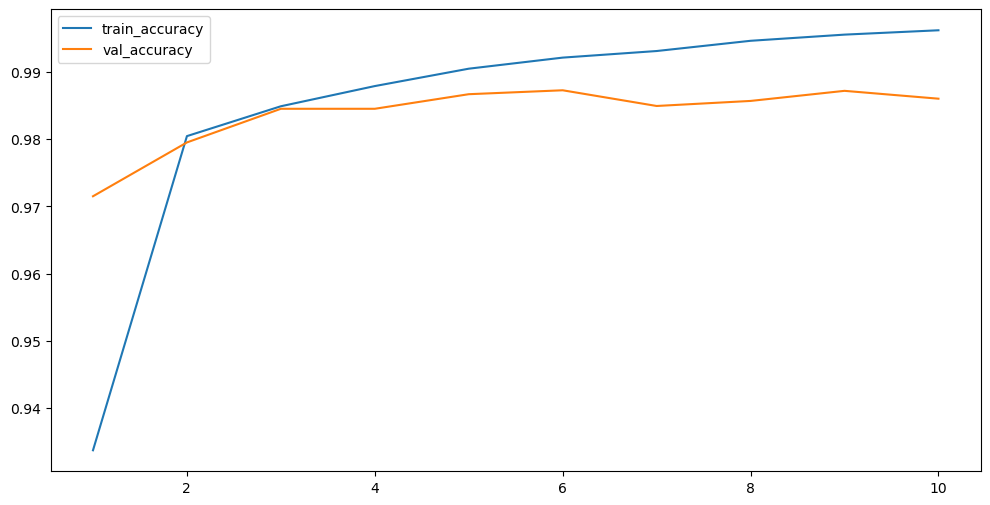

In [13]:
### 학습 결과 시각화(1) - loss

# plt 기본값 6.4 4.8

plt.figure(figsize=(12,6))
x = np.arange(1,11)
plt.plot(x, history.history['accuracy'], label='train_accuracy')
plt.plot(x, history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# 검증용 또는 평가용 기준으로.... train_loss val_loss로 바꿔서 해볼 것 

## 학습된 모델의 가중치 확인

In [14]:
print('학습된 모델의 가중치 확인')

print('*'*80)

print(cnn.weights)

학습된 모델의 가중치 확인
********************************************************************************
[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.23171295, -0.33269122,  0.0815515 , -0.25058064,
           0.12705071, -0.3560276 , -0.46981958,  0.22596338,
           0.24980408,  0.09272239,  0.2047006 ,  0.09335462,
          -0.23777182,  0.00360127, -0.04466309, -0.04224636,
           0.1888755 , -0.18645008, -0.10346709, -0.07859997,
          -0.3247524 ,  0.1013374 , -0.02893845,  0.01417919,
           0.34740588,  0.21467918, -0.4284646 ,  0.02259974,
           0.13701509, -0.01297613, -0.1768984 , -0.22261864]],

        [[ 0.13487864,  0.02658434,  0.0981326 , -0.44697472,
           0.23639932, -0.09402832, -0.21463348,  0.03336183,
           0.37515482,  0.05269046, -0.03856954, -0.04631793,
          -0.3531006 ,  0.10729789,  0.10541303, -0.31687805,
          -0.00535236,  0.17803192, -0.44848445,  0.16596237,
          -0.42372695

In [15]:
## 평가용 데이터에 대한 성능 평가
result = cnn.evaluate(X_test, y_test, batch_size=100)

# 결과 확인하기
print(f'평가용 데이터에 대한 성능 평가 : \n{result}')

100/100 [==============================] - 1s 9ms/step - loss: 0.0397 - accuracy: 0.9884
평가용 데이터에 대한 성능 평가 : 
[0.039730899035930634, 0.9883999824523926]


In [16]:
X_test.shape

(10000, 28, 28, 1)

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

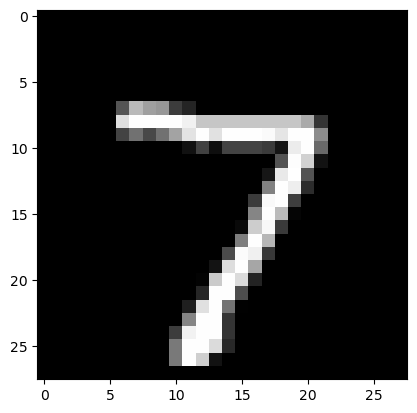

0번째 평가용 데이터의 레이블 : 
7
********************************************************************************


In [17]:
### 첫번째 평가용 데이터에 대한 예측

# 정답 확인
sample = X_test[0, :, :, :]
print(sample)
plt.imshow(sample, cmap='gray')
plt.show()
#원본 이미지를 볼 수 있는데,
print(f'0번째 평가용 데이터의 레이블 : \n{y_test[0]}')

print('*'*80)

# 예측 : model.predict()



# VGG16 모델을 이용한 이미지 분류 실습

In [18]:
### VGG16 모델을 이용한 이미지 분류 실습
#
#모델소개
#1. 개요 : 옥스포드 대학의 연구팀 VGG에 의해 개발된 이미지 분류용 모델
#2. 구조 : Conv2D layer 13개 + MaxPooling2D layer 5개, Flatten layer 1개 + Dense layer 3개
#Maxpooling과 Flatten layer에는 가중치가 없으므로 앞뒤로 더해서 VGG16.

In [19]:
#재구성 모델 생성
#- 모델 생성의 두번째 방법 : 입력 layer와 출력 layer를 지정해 줌으로써 모델을 만들 수 있음
#1) tf.keras.Model(inputs, outputs)
#2) 예시
#inputs = tf.keras.Input(shape=(3,))
#outputs = tf.keras.layers.Dense(4, activation='relu', activation='softmax')(inputs)
#model = tf.keras.Model(inputs=inputs, outputs=outputs)

## 데이터 증식을 이용하여 이미지 분류하기

### 모델 생성의 두번째 방법

In [20]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

In [22]:
'''
### 모델 생성의 첫번째 방법
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2d()
.
.
.
)
'''

'''
### 모델 생성의 두번째 방법
model = tf.keras.Model(inputs, outputs)
'''

# 입력 생성용 전용 함수
inputs = tf.keras.Input(shape=(3,))

# 출력 생성
outputs = tf.keras.layers.Dense(units=4, activation='softmax')(inputs)

# 모델 생성
model = tf.keras.Model(inputs, outputs)

# 결과 확인
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 16        
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Generation

In [23]:
### 기본 모델 생성하기
base_model = tf.keras.applications.vgg16.VGG16(weights=None)

# 모델 구조 확인
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
### 학습 전 기본 모델의 가중치 확인
print(base_model.weights)

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
array([[[[-0.01293196,  0.07554924,  0.06906249, ..., -0.09669562,
           0.0968949 , -0.08149113],
         [-0.04271078, -0.06040556,  0.08886071, ..., -0.06426936,
          -0.01738299, -0.0861212 ],
         [-0.03063621, -0.09639561,  0.05552842, ..., -0.02195161,
          -0.08044682,  0.0224385 ]],

        [[ 0.08931153, -0.08480199, -0.01275868, ...,  0.06124412,
           0.05698743, -0.04129397],
         [ 0.0700593 , -0.01983468,  0.04208343, ..., -0.01981637,
           0.01318612,  0.01422506],
         [-0.03302768,  0.01159646,  0.02333844, ...,  0.07898745,
          -0.02694569,  0.03692177]],

        [[-0.03096806, -0.09970168,  0.00207112, ...,  0.07431741,
          -0.07535889, -0.02570151],
         [ 0.03784327,  0.0619231 ,  0.07069398, ...,  0.02858008,
          -0.01893231,  0.00098992],
         [ 0.0913859 ,  0.04029334,  0.09918173, ..., -0.05946849,
          -0.0897